In [3]:
import random 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv


In [22]:
def sigmoid(x):
    return 1.0/ (1.0 + np.exp(-x)) 
def dsigmoid(x):
    return np.exp(x)/ (1.0 + np.exp(x))**2


class MLP:
    def __init__(self):
            self.layers=3 #0 is the input layer
            self.d=[1,2,1] #d is the list of no. of nodes in each layer 
            self.b = [None]
            self.w = [None]
            self.a = [None]
            self.z = [None]
            random.seed(42)

            
    def initialise(self):
        for idx in range(len(self.d)-1):
            self.w.append(np.array([[ random.random()   for i in range(self.d[idx])] for j in range(self.d[idx+1])]))
            bias=random.random() 
            self.b.append(np.array([ bias for j in range(self.d[idx+1])]))
                                   
    def forward_prop(self,X):
        self.a = [None]
        self.z = [None]

        self.a[0]=X
        for layer in range(1,self.layers):
            self.z.append(np.matmul(self.w[layer],self.a[layer-1]) + self.b[layer])
            self.a.append(sigmoid(self.z[layer]))
            

        
    def back_prop(self,X,Y):
        last_l = self.layers-1 #index of last layer 
        self.dw = [None for _ in range(last_l+1)]
        self.delta = [None for _ in range(last_l+1)]
        self.delta[last_l] = np.multiply((self.a[last_l]-Y),dsigmoid(self.z[last_l])) 
       
        #Reshaping the 1-D arrays. Numpy does not let us find the tranpose of 1D array

        del_2D = self.delta[last_l].reshape(len(self.delta[last_l]),1)
        a_2D = self.a[last_l-1].reshape(len(self.a[last_l-1]),1)
        self.dw[last_l]=np.dot(del_2D,a_2D.T)
        for l in range(last_l-1,0,-1):
            self.delta[l] = np.multiply((np.dot(self.w[l+1].T,self.delta[l+1])),dsigmoid(self.z[l]))
            del_2D = self.delta[l].reshape(len(self.delta[l]),1)
            a_2D = self.a[l-1].reshape(len(self.a[l-1]),1)
            self.dw[l]=np.dot(del_2D,a_2D.T)
            
    def update_weights(self,rate):      
        for l in range(1,self.layers):
            self.w[l]=np.subtract(self.w[l],rate*self.dw[l])
            self.b[l]=np.subtract(self.b[l],rate*np.sum(self.delta[l],keepdims=True))
            
    def fit(self,X_train,y_train):
        count = 1
        epochs = 500
        total_err = 0
        errors=[]
        epoch_n=[]
        for _ in range(epochs):
            total_err = 0
            for idx,x in enumerate(X_train):

                self.forward_prop(x)    
                err= (y_train[idx][0]-self.a[nn.layers-1][0])**2
                total_err = total_err + (0.5*err)
                nn.back_prop(x,y_train[idx])
                self.update_weights(1.0)
            total_err=total_err/len(X_train)
            if(count%10 == 1):
                print("epoch = ",count," Error = ",total_err)
                errors.append(total_err)
                epoch_n.append(count)
            count=count+1
            
        nn.show_err(errors,epoch_n)
        return errors
    
    def show_err(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=8)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimisation")
        plt.show()

In [376]:
def gen_data(no_of_datapoints,filename):
    N=no_of_datapoints
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["x1","y1"])
        i = 0
        slope = np.random.uniform(-1,1)
        while(i<N):
            x = np.random.uniform(-100,100)
            y = slope*x+ np.random.uniform(-30*np.random.uniform(0,1),30*np.random.uniform(0,1)) #adding noise
            writer.writerow([x,y]) 
            i+=1

In [10]:
def plot(X,Y):
    plt.figure(figsize=(12,12))
    plt.scatter(X,Y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()



In [11]:

def separate(X,Y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=4)
    X_train=X_train.reshape(-1,1)
    y_train=y_train.reshape(-1,1)
    X_test=X_test.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    return X_train, X_test, y_train, y_test

In [6]:
filename = 'reg.csv'
gen_data(500,filename)


In [7]:
df=pd.read_csv(filename)
df.head()

,x1,y1
0,-46.072943,-46.869617
1,59.586748,37.697026
2,36.303087,27.303393
3,88.272431,78.176087
4,39.470913,38.163634


In [8]:
df['y1']=(df['y1']-min(df['y1']))/(max(df['y1'])-min(df['y1']))
df['x1']=(df['x1']-min(df['x1']))/(max(df['x1'])-min(df['x1']))

X = df['x1'].values
Y = df['y1'].values
df.head()


,x1,y1
0,0.267930,0.262231
1,0.797629,0.683506
2,0.680902,0.631730
3,0.941438,0.885156
4,0.696783,0.685831


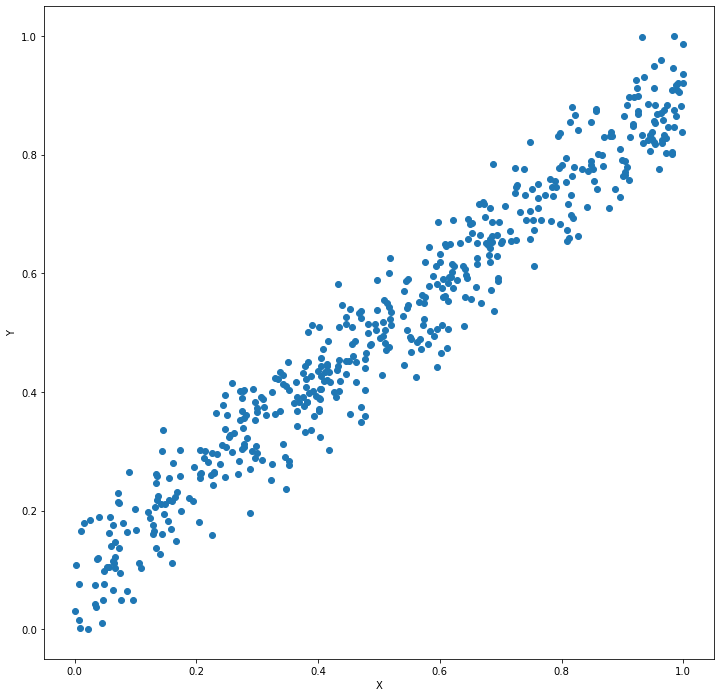

In [12]:
plot(X,Y)
X_train, X_test, y_train, y_test=separate(X,Y)

epoch =  1  Error =  0.028247219721685618
epoch =  11  Error =  0.001938381973213681
epoch =  21  Error =  0.0019325380617812484
epoch =  31  Error =  0.0019279810874419346
epoch =  41  Error =  0.0019242874807424053
epoch =  51  Error =  0.0019213321520913677
epoch =  61  Error =  0.0019189754539595638
epoch =  71  Error =  0.0019170956002096263
epoch =  81  Error =  0.0019155942162864346
epoch =  91  Error =  0.0019143934132148568
epoch =  101  Error =  0.0019134317743791129
epoch =  111  Error =  0.0019126608408918991
epoch =  121  Error =  0.001912042296736038
epoch =  131  Error =  0.0019115457682407704
epoch =  141  Error =  0.0019111471142282234
epoch =  151  Error =  0.0019108270976410779
epoch =  161  Error =  0.0019105703515323905
epoch =  171  Error =  0.0019103645719853377
epoch =  181  Error =  0.0019101998862559142
epoch =  191  Error =  0.0019100683565652795
epoch =  201  Error =  0.001909963589222261
epoch =  211  Error =  0.0019098804257918324
epoch =  221  Error =  0.

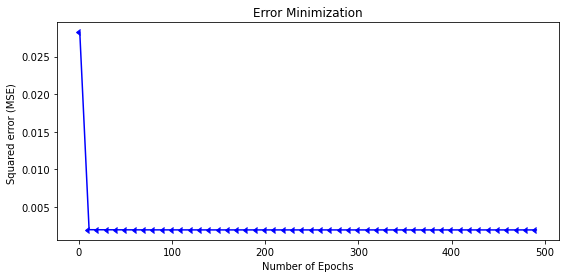

In [13]:
nn=MLP()
nn.initialise()
errors0=nn.fit(X_train,y_train)

In [14]:
def predict(nn,X_train,y_train,X_test,y_test):
    total_err = 0
    y_pred = []
    for idx,x in enumerate(X_test):
        nn.forward_prop(x)
        err= (y_test[idx][0]-nn.a[nn.layers-1][0])**2
        y_pred.append(nn.a[nn.layers-1])
        total_err = total_err + (0.5*err)

    total_err=total_err/len(X_test)
    print("Out of sample error",total_err)
    return y_pred





Out of sample error 0.0019547635614922693


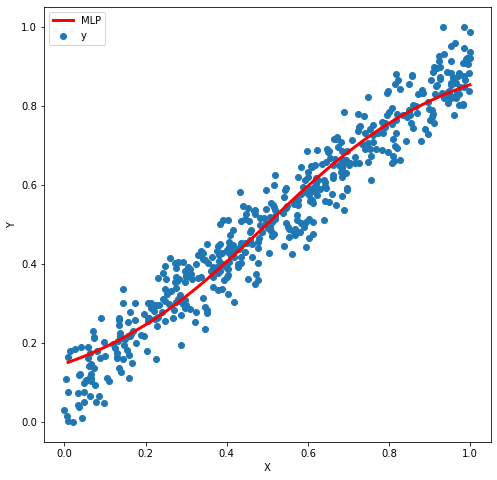

In [18]:
#Figure showing how the line fits the data
y_pred=np.array(predict(nn,X_train,y_train,X_test,y_test))

plt.figure(figsize=(8,8))
plt.scatter(X,Y,label='y')
plt.xlabel("X")
plt.ylabel("Y")

plt.plot(np.unique(X_test[:,0]),np.unique(y_pred[:,0]),linewidth=3,c='r',label='MLP')
plt.legend()

plt.show()


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()

model.fit(X_train,y_train)
y_pred1=model.predict(X_test)
t_err =0
for y1,y2 in zip(y_test,y_pred1):
    err=(y1[0]-y2[0])**2
    t_err+=err*0.5
t_err=t_err/len(y_test)
print("Linear regression : out of sample error ",t_err)

Linear regression : out of sample error  0.00166130760198333


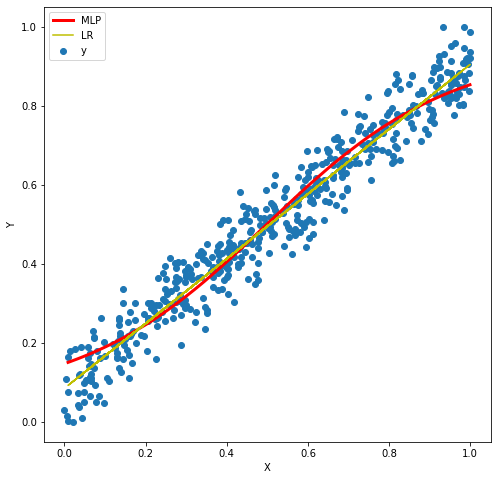

In [20]:
y_pred=np.array(y_pred)
y_pred1=np.array(y_pred1)

plt.figure(figsize=(8,8))
plt.scatter(X,Y,label='y')
plt.plot(np.unique(X_test[:,0]),np.unique(y_pred[:,0]),linewidth='3',c='r',label='MLP')
plt.plot(X_test[:,0],y_pred1[:,0],c='y',label='LR')
plt.xlabel("X")
plt.ylabel("Y")

plt.legend()


plt.show()